In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install nltk
!pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import files
uploaded = files.upload()


Saving instagram_comments.csv to instagram_comments.csv


In [4]:
df = pd.read_csv("instagram_comments.csv")  # replace with your file name
df.head()


,comment,label
0,Win a free iPhone now!!! Click here,spam
1,That was a great photo!,ham
2,Follow for follow 💯,spam
3,Love this! ❤️,ham
4,Subscribe to my channel now!,spam


In [5]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuations
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_comment'] = df['comment'].apply(clean_text)
df.head()


,comment,label,clean_comment
0,Win a free iPhone now!!! Click here,spam,win free iphone click
1,That was a great photo!,ham,great photo
2,Follow for follow 💯,spam,follow follow
3,Love this! ❤️,ham,love
4,Subscribe to my channel now!,spam,subscribe channel


In [6]:
X = df['clean_comment']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

         ham       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


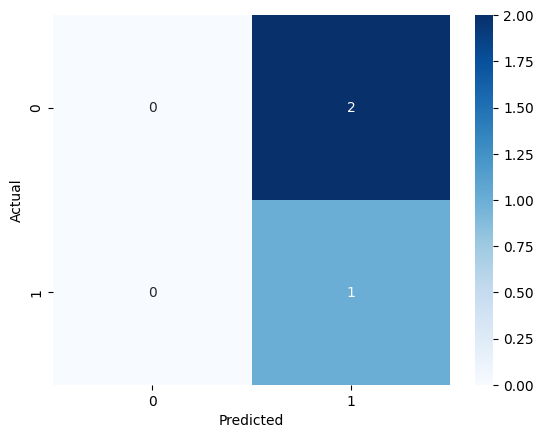

In [9]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
def predict_spam(comment):
    comment_clean = clean_text(comment)
    comment_tfidf = tfidf.transform([comment_clean])
    prediction = model.predict(comment_tfidf)
    return prediction[0]

predict_spam("Check out my profile for free followers!")  # Example


np.str_('spam')